<a href="https://colab.research.google.com/github/AIMLOps-Cohort4-G4/MiniProjects/blob/main/M1_NB_MiniProject_1_Employee_Attrition_Prediction_Group_4_Part_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Programme in AI and MLOps
## A programme by IISc and TalentSprint
### Mini Project Notebook: Employee Attrition Prediction

## Problem Statement

To predict employee attrition using CatBoost and XgBoost

## Learning Objectives

At the end of the experiment, you will be able to

* explore the employee attrition dataset
* apply CatBoost and XgBoost on the dataset
* tune the model hyperparameters to improve accuracy
* evaluate the model using suitable metrics


## Introduction

Employee attrition is the gradual reduction in employee numbers. Employee attrition happens when the size of your workforce diminishes over time. This means that employees are leaving faster than they are hired. Employee attrition happens when employees retire, resign, or simply aren't replaced.
Although employee attrition can be company-wide, it may also be confined to specific parts of a business.

Employee attrition can happen for several reasons. These include unhappiness about employee benefits or the pay structure, a lack of employee development opportunities, and even poor conditions in the workplace.

To know more about the factors that lead to employee attrition, refer [here](https://www.betterup.com/blog/employee-attrition#:~:text=Employee%20attrition%20is%20the%20gradual,or%20simply%20aren't%20replaced).


**Gradient Boosted Decision Trees**

* Gradient boosted decision trees (GBDTs) are one of the most important machine learning models.

* GBDTs originate from AdaBoost, an algorithm that ensembles weak learners and uses the majority vote, weighted by their individual accuracy, to solve binary classification problems. The weak learners in this case are decision trees with a single split, called decision stumps.

* Some of the widely used gradient boosted decision trees are XgBoost, CatBoost and LightGBM.

## Dataset

The dataset used for this mini-project is [HR Employee Attrition dataset](https://data.world/aaizemberg/hr-employee-attrition). This dataset is synthetically created by IBM data scientists. There are 35 features and 1470 records.

There are numerical features such as:

* Age
* DistanceFromHome
* EmployeeNumber
* PerformanceRating

There are several categorical features such as:
* JobRole
* EducationField
* Department
* BusinessTravel

Dependent or target feature is 'attrition' which has values as Yes/No.

In [1]:
#@title Download the data
!wget -qq https://cdn.iisc.talentsprint.com/CDS/Datasets/wa_fn_usec_hr_employee_attrition_tsv.csv
print("Data Downloaded Successfuly!!")

Data Downloaded Successfuly!!


## Grading = 10 Points

### Install Required Dependencies

In [2]:
# Install CatBoost
!pip -qq install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.2 MB/s eta 0:00:00


### Import Required Packages

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier, metrics
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 100)
%matplotlib inline

Please refer to the [ReadMe](https://drive.google.com/file/d/13XGmUlYT6etOBFgMbPLPCiW9wzx6pSQC/view?usp=sharing) before proceeding further.

# Part-A

## Load the Dataset

**Exercise 1: Read the dataset [0.5 Mark]**

**Hint:** pd.read_csv()

In [4]:
# read the dataset
# YOUR CODE HERE
# read the dataset
data = pd.read_csv('wa_fn_usec_hr_employee_attrition_tsv.csv')
data.head()

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [5]:
# Check the shape of dataframe.
# YOUR CODE HERE
data.shape

(1470, 35)

## Data Exploration

- Check for missing values
- Check for features having consistent data across samples
- Check for outliers or inconsistencies in data columns
- Check for correlated features
- Do we have a target label imbalance
- How our independent variables are distributed relative to our target label
- Are there features that have strong linear or monotonic relationships? Making correlation heatmaps makes it easy to identify possible collinearity

**Exercise 2: Create a `List` of numerical and categorical columns. Display a statistical description of the dataset. Remove missing values (if any) [0.5 Mark]**

**Hint:**
>Use `for` to iterate through each column.

>For statistical description display - samples count, missing values count, range, and data type of each feature.

In [6]:
# YOUR CODE HERE
print(f"Columns count:{len(data.columns)}\n\n")

for col in data.columns:
    print(f"Column: {col}")
    print(f"Samples count: {data[col].count()}")
    print(f"Missing values count: {data[col].isnull().sum()}")
    if pd.api.types.is_numeric_dtype(data[col]):
        print(f"Range: {data[col].min()} to {data[col].max()}")
    print(f"Data type: {data[col].dtype}")
    print("\n")

    # Show statistics in tabular format
statistics = {"Column": [],
        "Samples count": [],
        "Missing values count": [],
        "Range": [],
        "Data type": []
}

for col in data.columns:
    statistics["Column"].append(col)
    statistics["Samples count"].append(data[col].count())
    statistics["Missing values count"].append(data[col].isnull().sum())
    if pd.api.types.is_numeric_dtype(data[col]):
         statistics["Range"].append(f"{data[col].min()} to {data[col].max()}")
    else:
        statistics["Range"].append("N/A")
    statistics["Data type"].append(data[col].dtype)

statistics_df = pd.DataFrame(statistics)

statistics_df

Columns count:35


Column: age
Samples count: 1470
Missing values count: 0
Range: 18 to 60
Data type: int64


Column: attrition
Samples count: 1470
Missing values count: 0
Data type: object


Column: businesstravel
Samples count: 1470
Missing values count: 0
Data type: object


Column: dailyrate
Samples count: 1470
Missing values count: 0
Range: 102 to 1499
Data type: int64


Column: department
Samples count: 1470
Missing values count: 0
Data type: object


Column: distancefromhome
Samples count: 1470
Missing values count: 0
Range: 1 to 29
Data type: int64


Column: education
Samples count: 1470
Missing values count: 0
Range: 1 to 5
Data type: int64


Column: educationfield
Samples count: 1470
Missing values count: 0
Data type: object


Column: employeecount
Samples count: 1470
Missing values count: 0
Range: 1 to 1
Data type: int64


Column: employeenumber
Samples count: 1470
Missing values count: 0
Range: 1 to 2068
Data type: int64


Column: environmentsatisfaction
Samples count: 1470

,Column,Samples count,Missing values count,Range,Data type
0,age,1470,0,18 to 60,int64
1,attrition,1470,0,N/A,object
2,businesstravel,1470,0,N/A,object
3,dailyrate,1470,0,102 to 1499,int64
4,department,1470,0,N/A,object
5,distancefromhome,1470,0,1 to 29,int64
6,education,1470,0,1 to 5,int64
7,educationfield,1470,0,N/A,object
8,employeecount,1470,0,1 to 1,int64
9,employeenumber,1470,0,1 to 2068,int64


First, we want to get a sense of our data:
- What features have the most divergent distributions based on target class
- Do we have a target label imbalance
- How our independent variables are distributed relative to our target label
- Are there features that have strong linear or monotonic relationships, making correlation heatmaps makes it easy to identify possible colinearity

### Check for outliers

**Exercise 3: Create a box plot to check for outliers [0.5 Mark]**

In [15]:
# Check for outliers
# Determine the number of rows and columns for the subplots

def make_boxplots(columns):
  n_cols = 3  # You can adjust this number based on your preference
  n_rows = (len(columns) + n_cols - 1) // n_cols

  # Create subplots
  fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))

  # Flatten the axes array for easier indexing
  axes = axes.flatten()

  for i, col in enumerate(columns):
      ax = axes[i]
      sns.boxplot(y=data[col], ax=ax, color='green', width=0.8)
      ax.set_title(col, fontsize=18, fontweight='normal')
      ax.set_ylabel('Value', fontsize=10)
      ax.tick_params(axis='y', labelsize=8)



      # Set background color to white
      ax.set_facecolor('white')

  # Remove any unused subplots
  for j in range(i+1, len(axes)):
      fig.delaxes(axes[j])

  # Set the figure background to white
  fig.patch.set_facecolor('white')

  plt.tight_layout()
  plt.show()

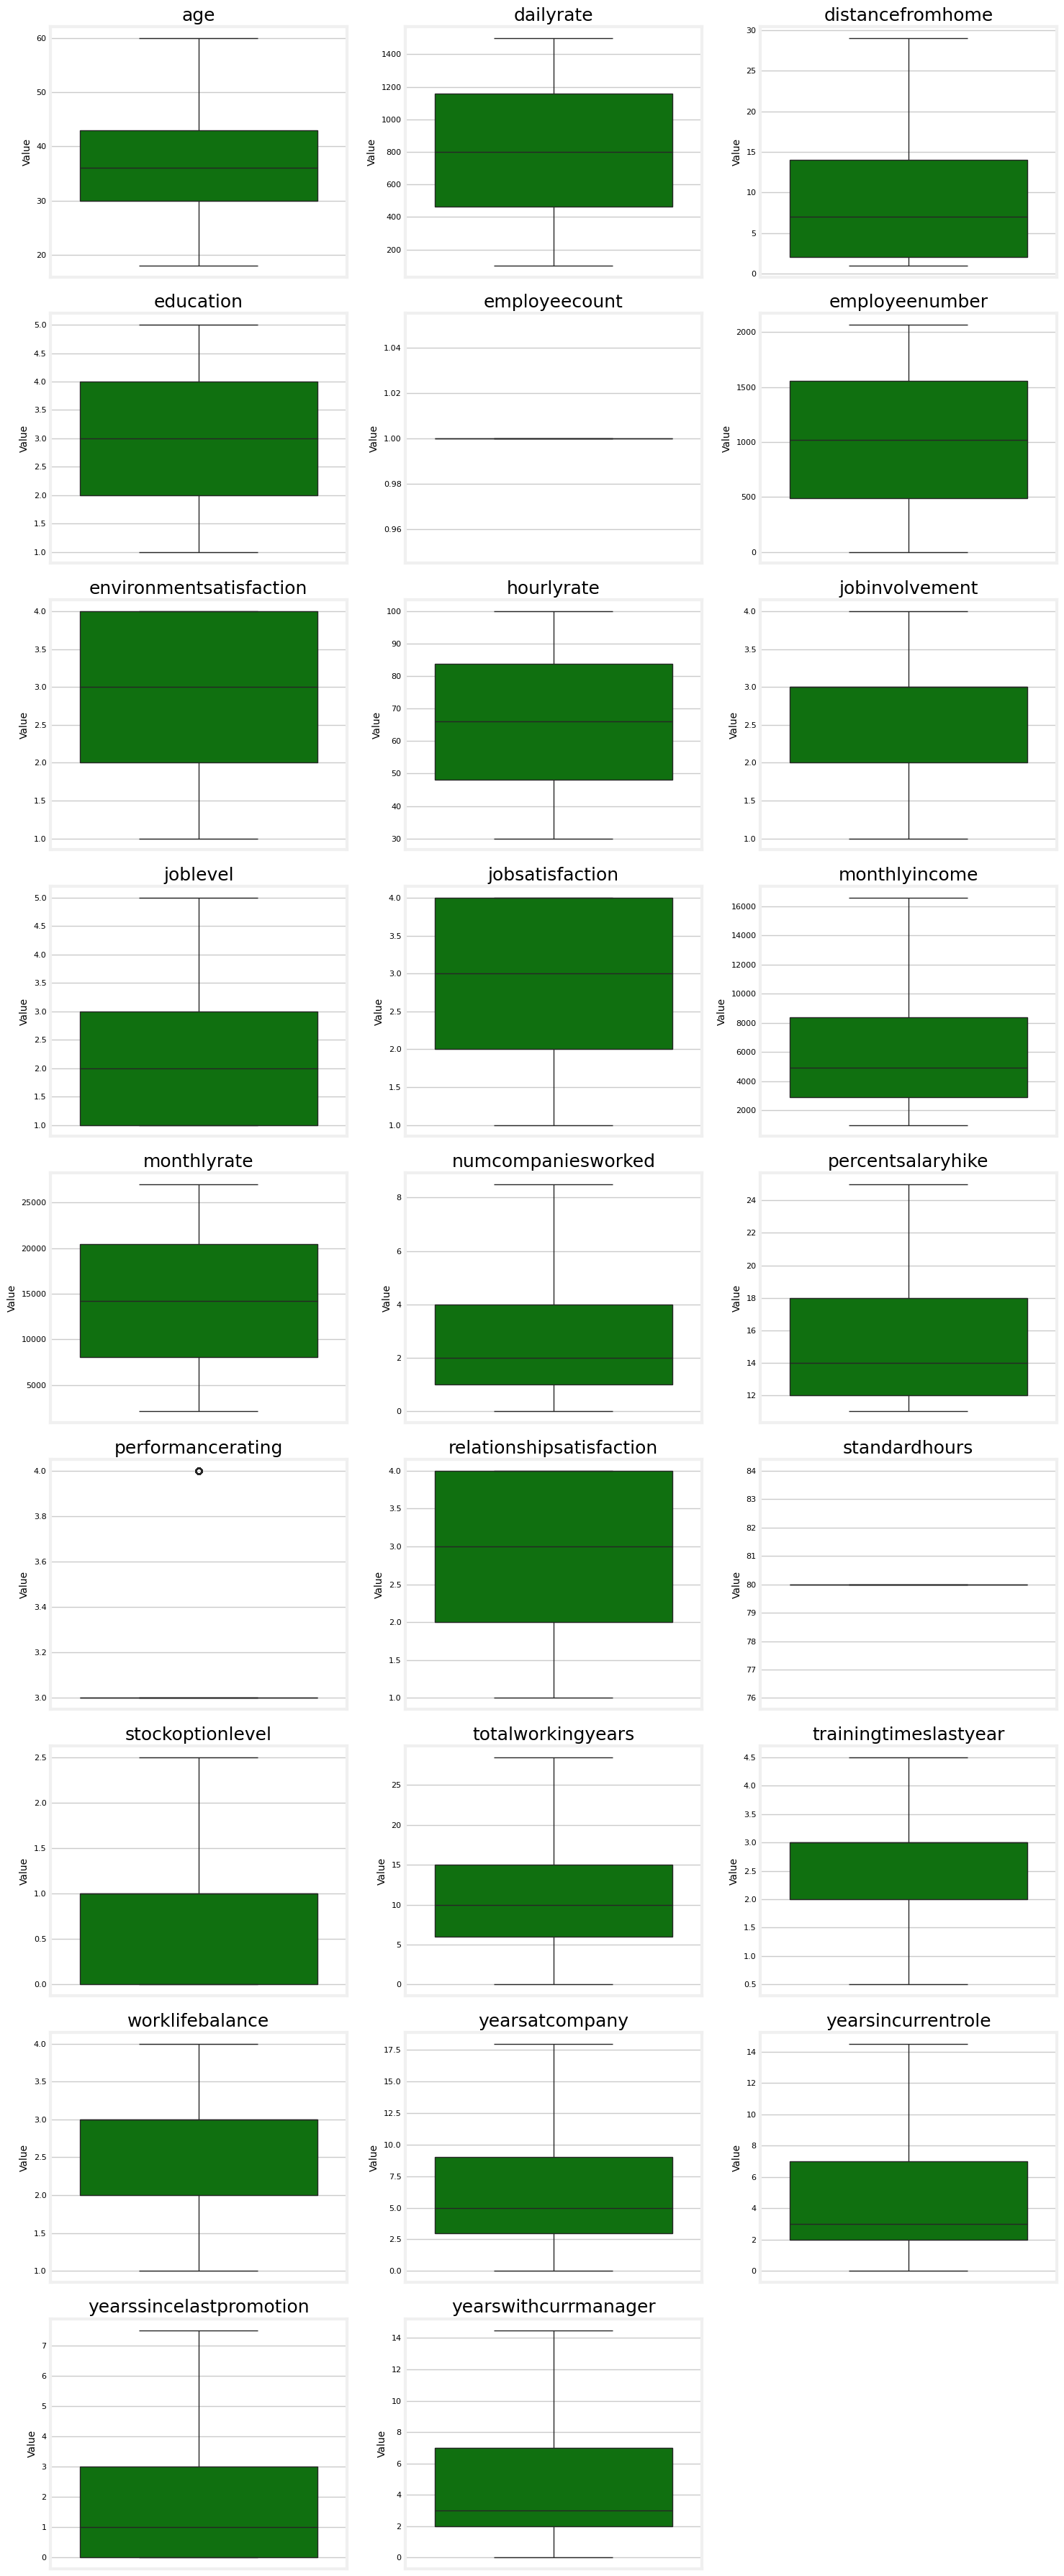

In [16]:
# Check for outliers
# Determine the number of rows and columns for the subplots
# Get all numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

make_boxplots(numerical_columns)

### Handling outliers

**Exercise 4: Use lower bound as 25% and upper bound as 75% to handle the outliers [0.5 Mark]**

In [8]:
# YOUR CODE HERE
# Function to cap outliers based on IQR
def cap_outliers(data, col):
    Q1 = data[col].quantile(0.25)  # 25th percentile
    Q3 = data[col].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1                # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])
    return data

data = cap_outliers(data, 'monthlyincome')

data.shape

(1470, 35)

Text(0, 0.5, 'Values')

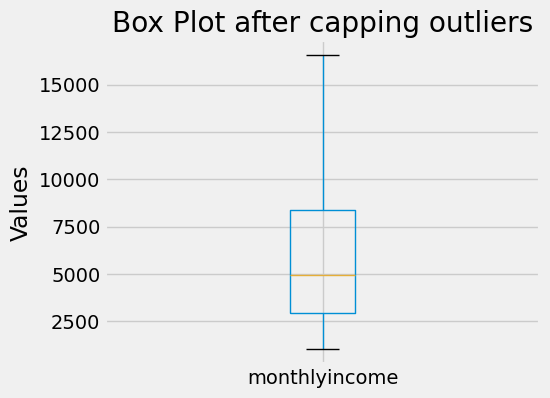

In [9]:
# Recheck for outliers
# YOUR CODE HERE
plt.figure(figsize=(5, 4))
data.boxplot(column=['monthlyincome'])
plt.title('Box Plot after capping outliers')
plt.ylabel('Values')

### Target label imbalance

**Exercise 5: Check if there is an imbalance in target label [0.5 Mark]**

**Hint:** Use value_counts()

In [10]:
# Count of unique values in Attrition column
# YOUR CODE HERE
#using value_counts function fetching the number of No's and Yes's values in the form of Series object
value_count=data['attrition'].value_counts()
value_count

,count
attrition,
No,1233
Yes,237


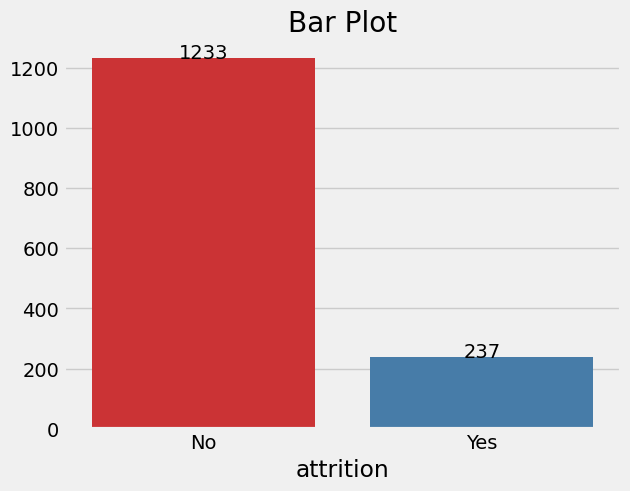

In [11]:
# Plot barplot to visualize balance/imbalance
# YOUR CODE HERE
#add title to the chart
plt.title('Bar Plot')
#Render barplot using seaborn barplot function.
bar_data=sns.barplot(x=value_count.keys(),y=value_count.values,palette= 'Set1')

#Adding the text(count of YES and NO) on top of each Bar
for i,v in enumerate(value_count.values):
    plt.text(i, v, v,ha="center", fontsize=14)


plt.show()

If there is any imbalance in the dataset then a few techniques can be utilised (optional):
1. SMOTE
2. Cross Validation
3. Regularizing the model's parameters

###Plot pairplot

**Exercise 6: Visualize the relationships between the predictor variables and the target variable using a pairplot [0.5 Mark]**

**Hint:** Use sns.pairplot

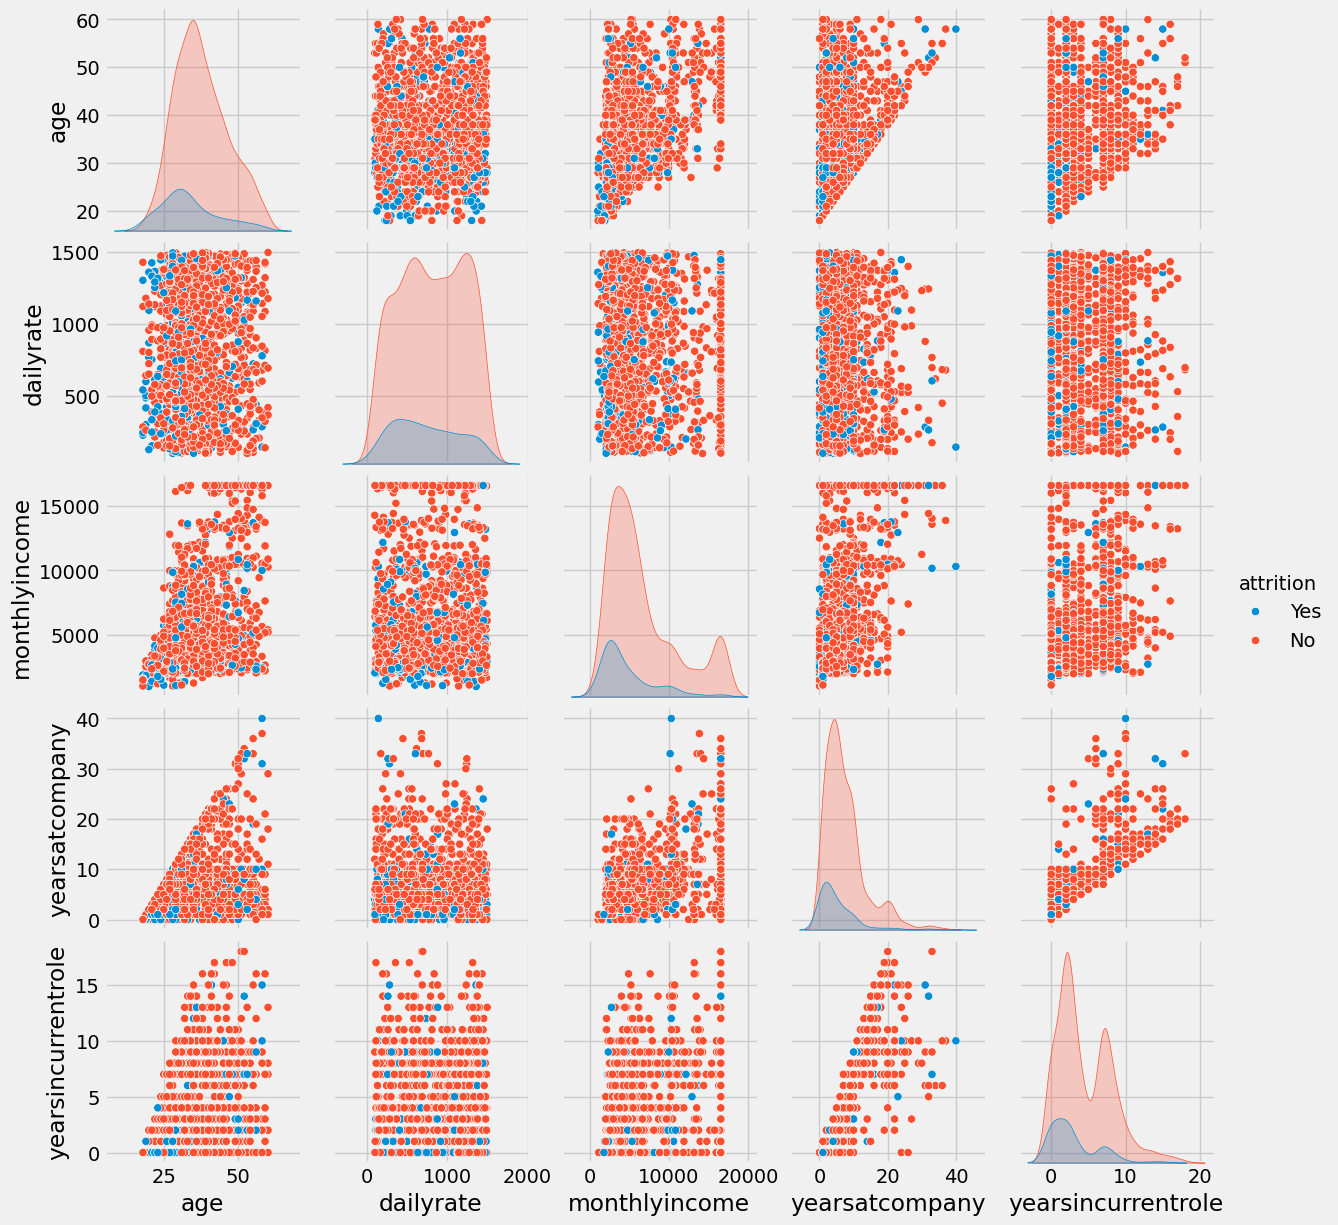

In [12]:
# Visualize a pairplot with relevant features
# YOUR CODE HERE
sns.pairplot(data[['age','dailyrate','monthlyincome','yearsatcompany','yearsincurrentrole','attrition']],hue='attrition')


### Explore Correlation

- Plotting the Heatmap

**Exercise 7: Visualize the correlation among IBM employee attrition numerical features using a heatmap [0.5 Mark]**

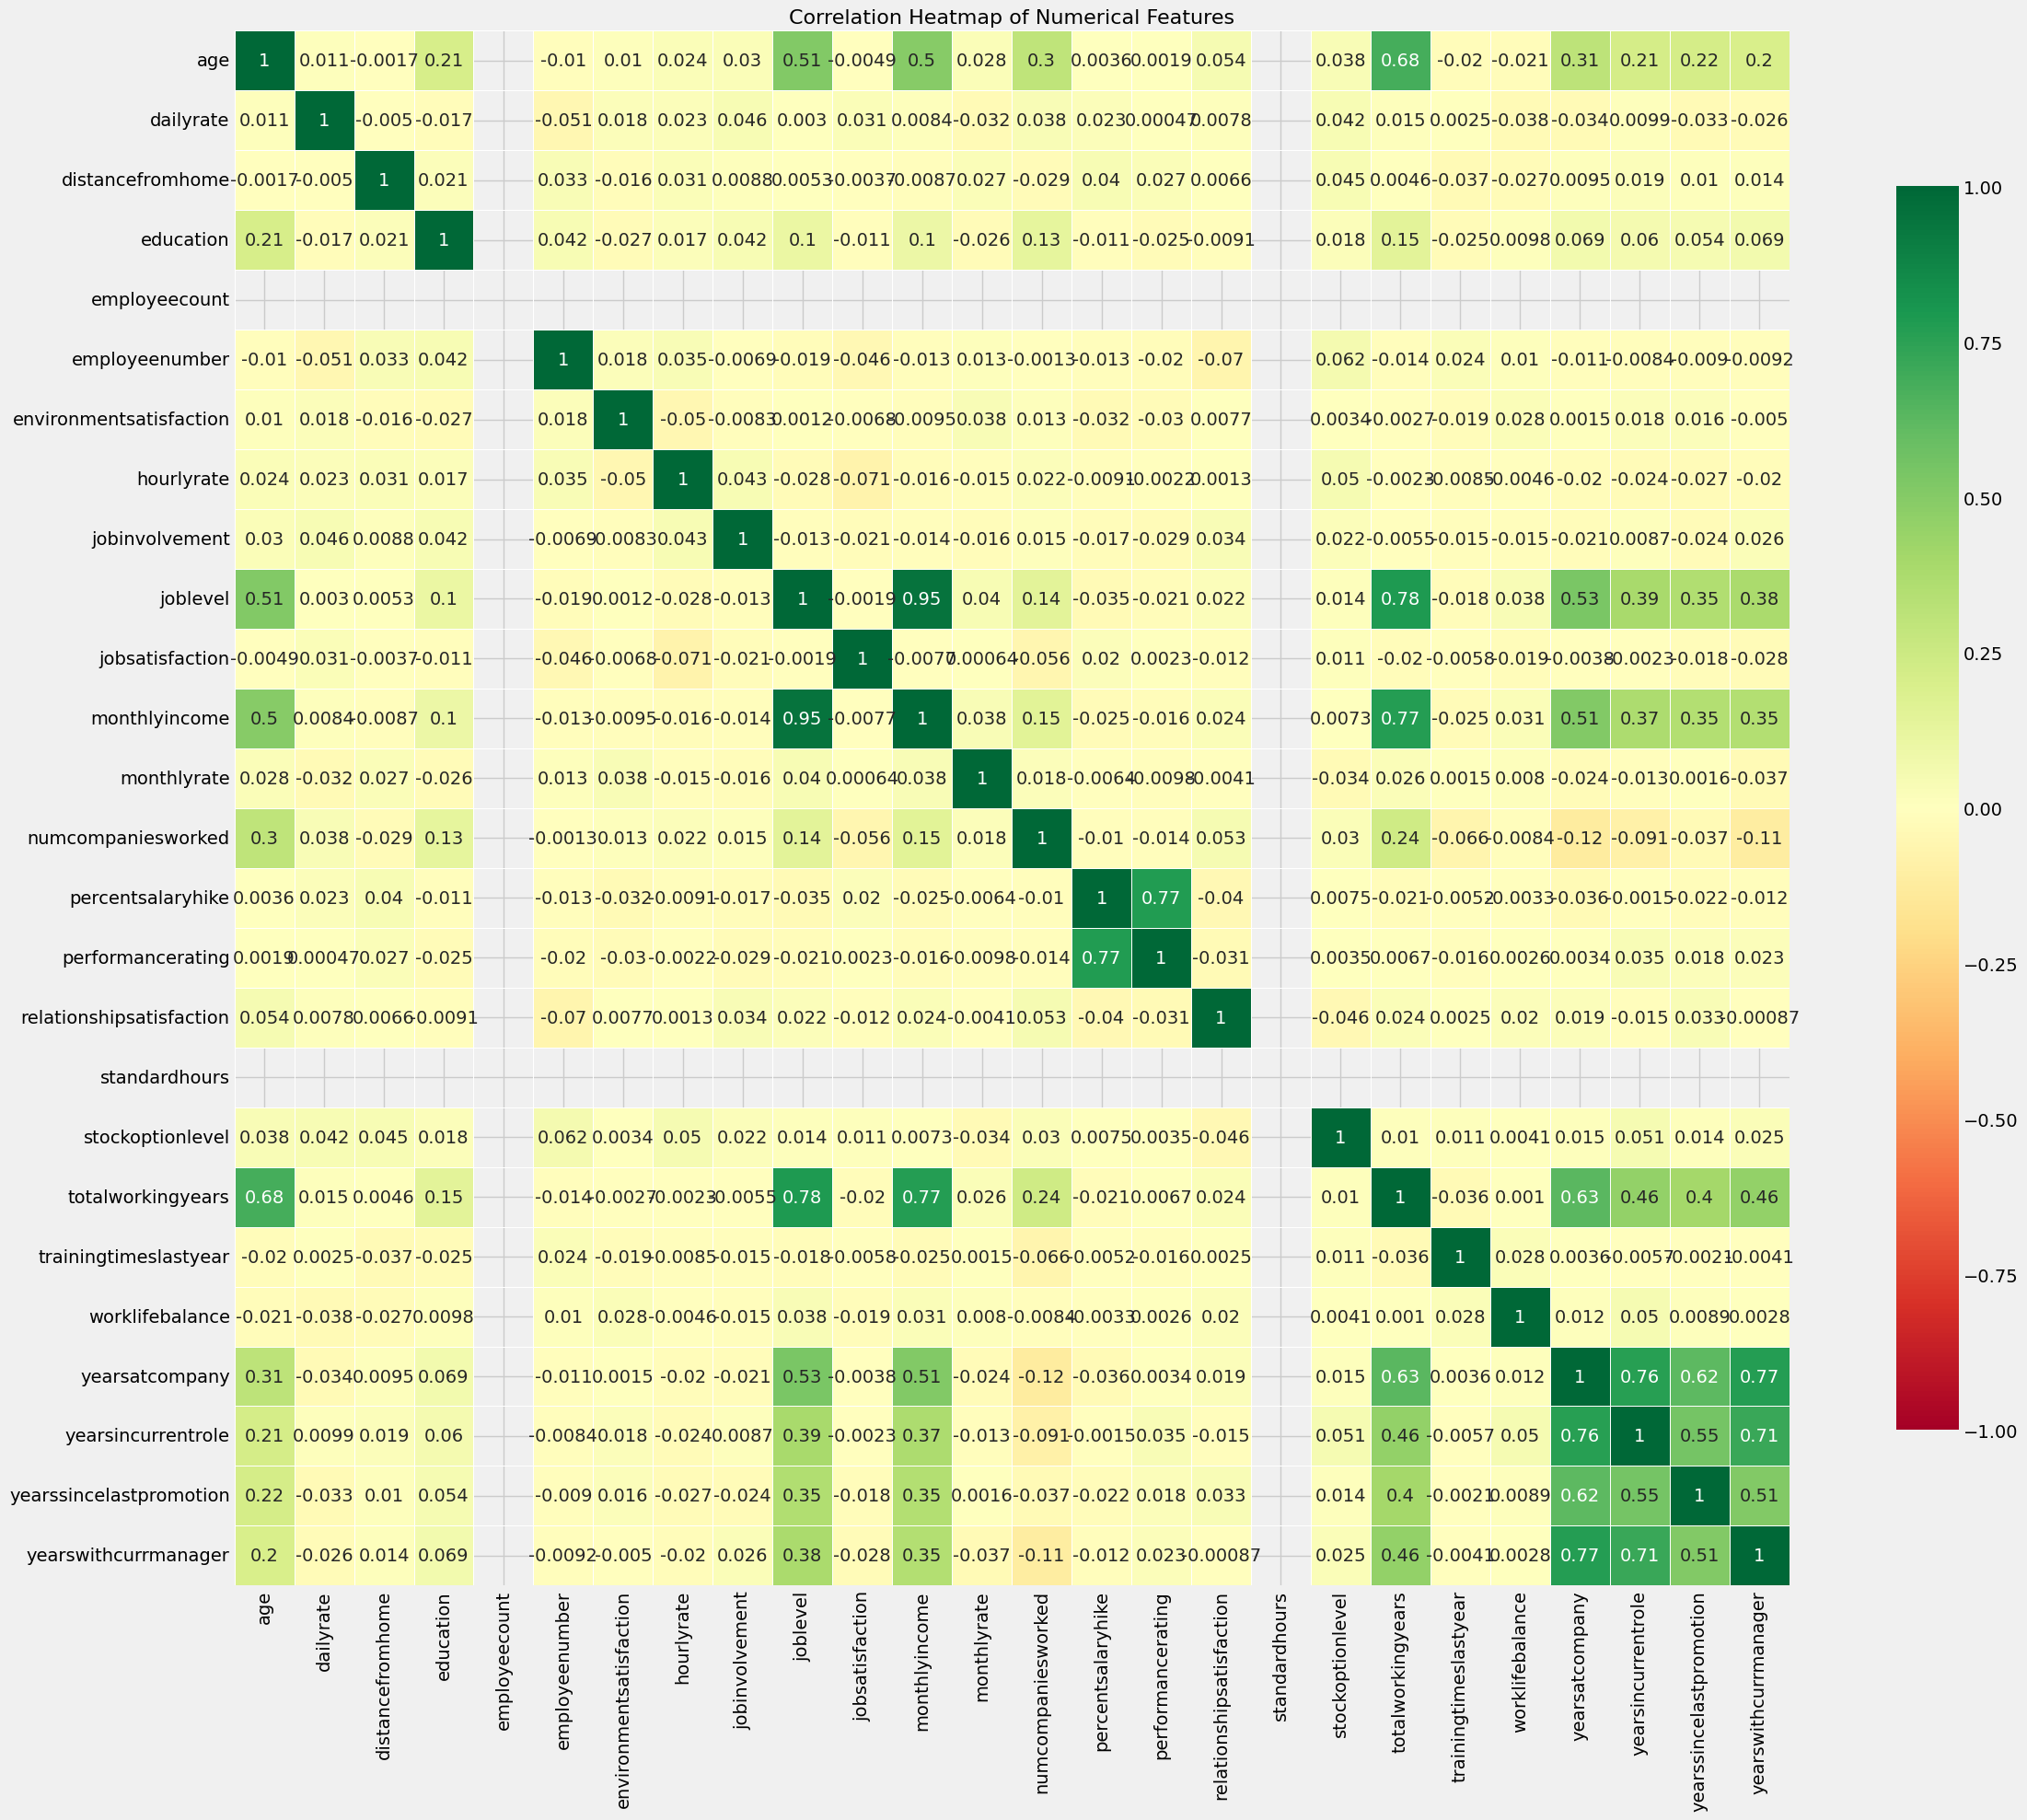

In [13]:
# Visualize heatmap
# YOUR CODE HERE
# Visualize heatmap
# Calculate the correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Create the heatmap
plt.figure(figsize=(25, 20))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap="RdYlGn",
            vmin=-1,
            vmax=1,
            center=0,
            square=True,
            linewidths=.5,
            cbar_kws={"shrink": .8})

plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

Comment on the observations made with the pairplot and heatmap

Pair Plot
1) Age between 30-45, we see lower attrition rate
2) Monthly income - lower monthly income indicates higher attrition rate

Interestingly, no negetive corelation!
Corelation
years at company and years in current role

There seem to be may people working at IBM for all of their working years!

years at company, years in current role, years since last promotion and years with current manager are all positively correlated.

Comment on the observations made with the pairplot and heatmap

# Part-B

### Preparing the test feature space
* Remove outliers if any
* Handle the categorical feature if required
* Other processing steps can also be followed.

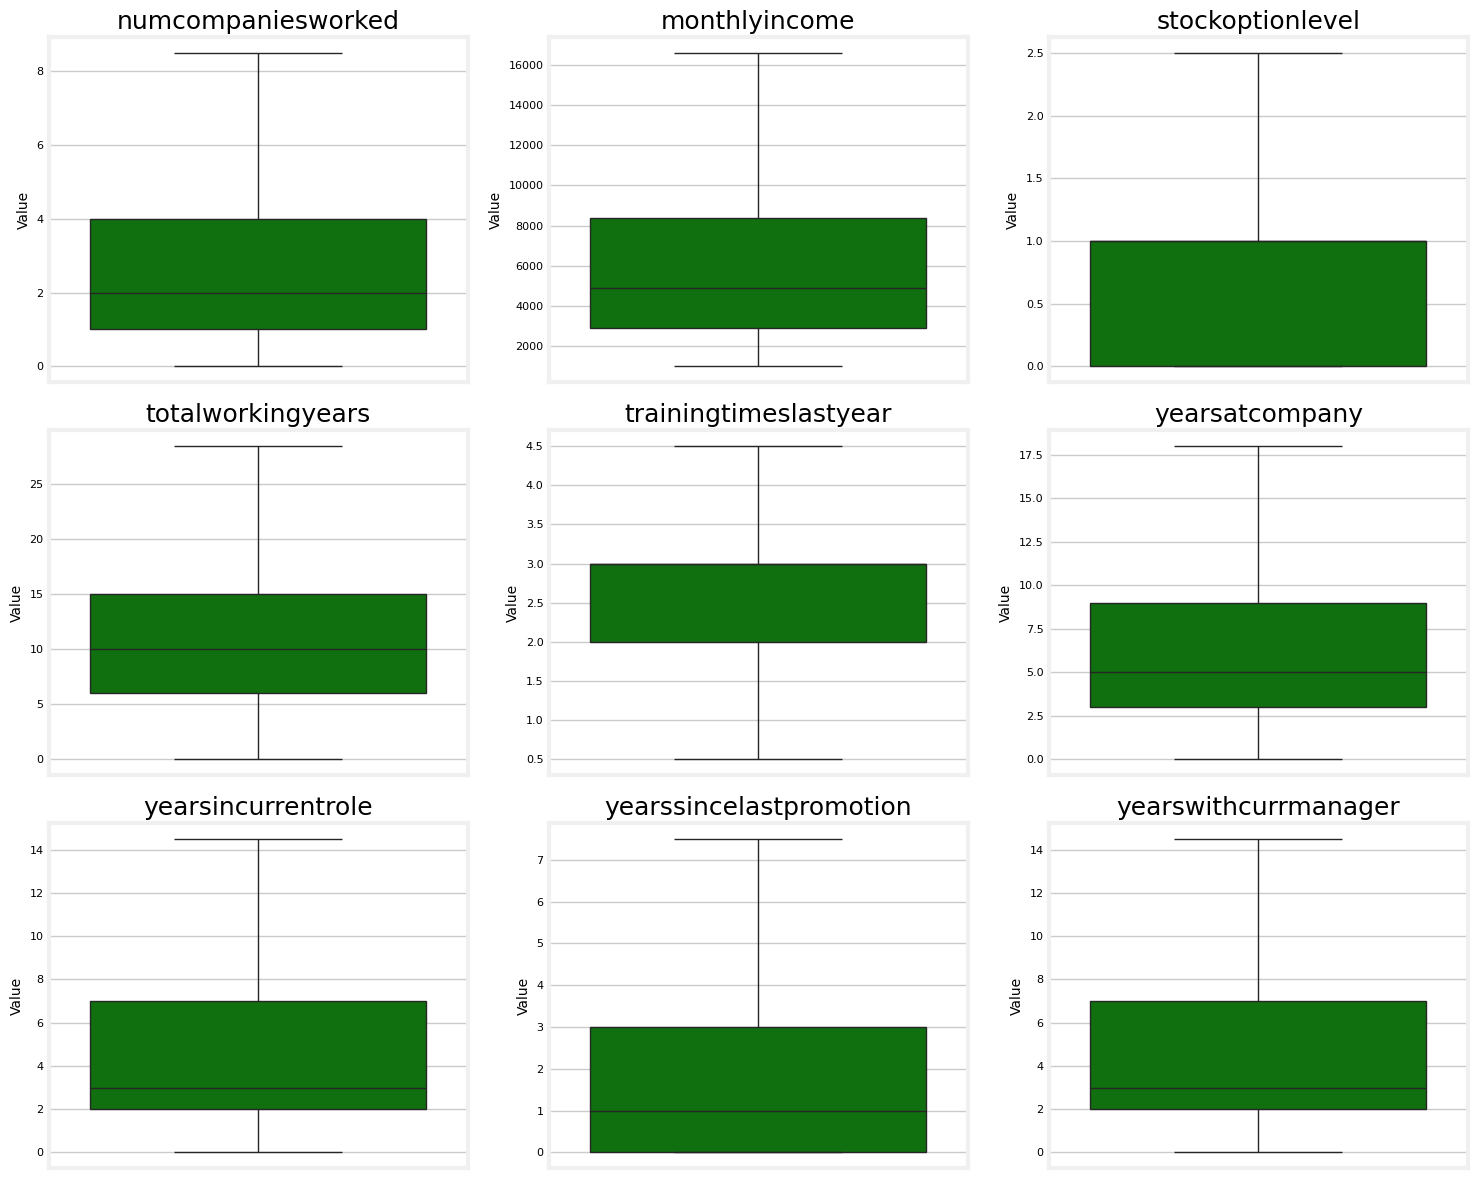

In [17]:
outlier_columns = ["numcompaniesworked", "monthlyincome", "performancerating", "stockoptionlevel", "totalworkingyears","trainingtimeslastyear", "yearsatcompany", "yearsincurrentrole", "yearssincelastpromotion", "yearswithcurrmanager"]
outlier_quantile_df = pd.DataFrame(columns=['column','low_bound','top_bound'])

#Impute/cap outliers
outlier_columns.remove('performancerating')
for col in outlier_columns:
  data = cap_outliers(data, col)

#visualize if the outliers imputed
make_boxplots(outlier_columns)

Optional:
Use `Hyperopt`, a hyperparameter tuning technique to identify the best set of parameters.

In the notebook, data processing is done separately for different models.
Considering the fact that different models may require data in different format and in turn different processes may be followed to process the data.

If the processing steps followed for the models are same, data processing can also be done once.

## Apply CatBoost

Catboost was released in 2017 by Yandex, showing, by their benchmark to be faster in prediction, better in accuracy, and easier to use for categorical data across a series of GBDT tasks. Additional capabilities of catboost include plotting feature interactions and object (row) importance.

[Here](https://catboost.ai/en/docs/) is the official documentation of CatBoost

### Data Processing for CatBoost

**Exercise 8: Data processing for CatBoost [1 Mark]**
* **Copy the dataframe that was created after removing the outliers**
* **Handle the categorical features if required**
* **Create target column and feature space**

**Hint:** Column containing the information on attrition will be the target column.

In [20]:
# Copy the data
data_copy_catboost = data.copy()

In [21]:
#treating categorical variables

categorical_data = data_copy_catboost.select_dtypes(exclude=[np.number])

# Apply one-hot encoding to categorical data
encoded_categorical_data = pd.get_dummies(categorical_data, drop_first=True)

print(f"Encoded categorical data size: {encoded_categorical_data.shape}")

# Combine cleaned numerical data with encoded categorical data
cleaned_data = pd.concat([data_copy_catboost[numerical_columns], encoded_categorical_data], axis=1)


print(f"Cleaned data size before dropping NaN values: {cleaned_data.shape}")

#Drop rows with NaN values as they represent rows with outliers
cleaned_data = cleaned_data.dropna()

print("\n")

print(f"Cleaned numerical data size: {data_copy_catboost.shape}")

print(f"Preprocessed data after dropping outliers and handling categorical data: {cleaned_data.shape}")

cleaned_data

Encoded categorical data size: (1470, 22)
Cleaned data size before dropping NaN values: (1470, 48)


Cleaned numerical data size: (1470, 35)
Preprocessed data after dropping outliers and handling categorical data: (1470, 48)


,age,dailyrate,distancefromhome,education,employeecount,employeenumber,environmentsatisfaction,hourlyrate,jobinvolvement,joblevel,jobsatisfaction,monthlyincome,monthlyrate,numcompaniesworked,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,attrition_Yes,businesstravel_Travel_Frequently,businesstravel_Travel_Rarely,department_Research & Development,department_Sales,educationfield_Life Sciences,educationfield_Marketing,educationfield_Medical,educationfield_Other,educationfield_Technical Degree,gender_Male,jobrole_Human Resources,jobrole_Laboratory Technician,jobrole_Manager,jobrole_Manufacturing Director,jobrole_Research Director,jobrole_Research Scientist,jobrole_Sales Executive,jobrole_Sales Representative,maritalstatus_Married,maritalstatus_Single,overtime_Yes
0,41,1102,1,2,1,1,2,94,3,2,4,5993.0,19479,8.0,11,3,1,80,0.0,8.0,0.5,1,6.0,4.0,0.0,5.0,True,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True
1,49,279,8,1,1,2,3,61,2,2,2,5130.0,24907,1.0,23,4,4,80,1.0,10.0,3.0,3,10.0,7.0,1.0,7.0,False,True,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False
2,37,1373,2,2,1,4,4,92,2,1,3,2090.0,2396,6.0,15,3,2,80,0.0,7.0,3.0,3,0.0,0.0,0.0,0.0,True,False,True,True,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,True,True
3,33,1392,3,4,1,5,4,56,3,1,3,2909.0,23159,1.0,11,3,3,80,0.0,8.0,3.0,3,8.0,7.0,3.0,0.0,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True
4,27,591,2,1,1,7,1,40,3,1,2,3468.0,16632,8.5,12,3,4,80,1.0,6.0,3.0,3,2.0,2.0,2.0,2.0,False,False,True,True,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,4,2571.0,12290,4.0,17,3,3,80,1.0,17.0,3.0,3,5.0,2.0,0.0,3.0,False,True,False,True,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,True,False,False
1466,39,613,6,1,1,2062,4,42,2,3,1,9991.0,21457,4.0,15,3,1,80,1.0,9.0,4.5,3,7.0,7.0,1.0,7.0,False,False,True,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False
1467,27,155,4,3,1,2064,2,87,4,2,2,6142.0,5174,1.0,20,4,2,80,1.0,6.0,0.5,3,6.0,2.0,0.0,3.0,False,False,True,True,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,True
1468,49,1023,2,3,1,2065,4,63,2,2,2,5390.0,13243,2.0,14,3,4,80,0.0,17.0,3.0,2,9.0,6.0,0.0,8.0,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,True,False,True,False,False


In [23]:
# do the required imports
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
# Split the data into features and target
X = cleaned_data.drop('attrition_Yes', axis=1)
y = cleaned_data['attrition_Yes']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Initialize CatBoost model
model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, verbose=False)
# Fit the model
model.fit(X_train, y_train, eval_set=(X_test, y_test), plot=True)
# Get feature importance
feature_importances = model.get_feature_importance(Pool(X_train, label=y_train))
feature_names = X_train.columns
# Combine feature names and importances into a DataFrame
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

,Feature,Importance
46,overtime_Yes,10.542860
0,age,5.754185
18,stockoptionlevel,5.359701
13,numcompaniesworked,5.082883
11,monthlyincome,4.851516
6,environmentsatisfaction,4.679890
10,jobsatisfaction,4.396720
25,yearswithcurrmanager,3.995787
2,distancefromhome,3.294022
12,monthlyrate,3.263850


In [24]:
# Select top features based on a threshold of 3.0.
# 3.0 is just an arbitrary threshold I had selected to pick only few features
selected_features = feature_importance_df[feature_importance_df['Importance'] > 3.0]['Feature']
selected_features

,Feature
46,overtime_Yes
0,age
18,stockoptionlevel
13,numcompaniesworked
11,monthlyincome
6,environmentsatisfaction
10,jobsatisfaction
25,yearswithcurrmanager
2,distancefromhome
12,monthlyrate


In [25]:
# Feature Space
# Filter the dataset to keep only the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

X_train_selected

,overtime_Yes,age,stockoptionlevel,numcompaniesworked,monthlyincome,environmentsatisfaction,jobsatisfaction,yearswithcurrmanager,distancefromhome,monthlyrate,joblevel,yearsatcompany,relationshipsatisfaction,jobinvolvement
714,False,50,1.0,8.5,16581.0,4,4,3.0,1,6615,4,5.0,3,3
135,False,36,2.0,6.0,4941.0,2,2,1.0,6,2819,2,3.0,4,3
1271,False,21,0.0,1.0,2679.0,2,2,0.0,7,4567,1,1.0,2,3
477,False,50,1.0,1.0,16581.0,1,2,7.0,3,7999,5,18.0,3,3
806,False,52,0.0,7.0,10445.0,2,2,0.0,7,15322,3,8.0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,False,35,2.0,1.0,3407.0,2,3,8.0,28,25348,2,10.0,4,4
1294,False,41,0.0,3.0,6870.0,2,2,2.0,5,15530,2,3.0,1,4
860,True,22,1.0,0.0,2853.0,3,4,0.0,3,4223,1,0.0,2,2
1459,True,29,1.0,4.0,4025.0,4,2,3.0,13,23679,2,4.0,1,2


### Model Definition

**Exercise 9: Define, train the model and display the results [2 Mark]**

**Hint:**
* Use CatBoostClassifier() to define the model with relevant parameters.
* Use `fit` to fit the data to the model. Refer [here](https://catboost.ai/en/docs/concepts/speed-up-training) to see some ways to speedup CatBoost training.
* Evaluate the model using roc_auc_score, accuracy_score, f1_score, predict methods or other relevant techniques.

In [26]:
# Create CatBoost model
# Define the CatBoost model with relevant parameters

model = CatBoostClassifier(
    iterations=500,           # Number of boosting iterations
    learning_rate=0.1,        # Learning rate
    depth=6,                  # Depth of the tree
    l2_leaf_reg=3,            # L2 regularization coefficient
    loss_function='Logloss',  # Loss function for binary classification
    eval_metric='AUC',        # Evaluation metric
    random_seed=42,           # Random seed for reproducibility
    logging_level='Silent'    # To suppress output during training
)


In [27]:
# Model training
# Fit the model
model.fit(X_train_selected, y_train)

# Make predictions
y_pred = model.predict(X_test_selected)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.86


### Model performance

In [48]:
# Model performance on all sets
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, precision_score, recall_score

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
precision_cat = precision_score(y_test, y_pred)
recall_cat = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")

print(len(y_pred))

l = []
l.append(['CatBoost',accuracy,precision_cat,recall_cat,f1,roc_auc])


Accuracy: 0.86
F1 Score: 0.29
ROC AUC Score: 0.74
Confusion Matrix:
[[369  11]
 [ 49  12]]
441


## Apply XGBoost

XGBoost is a workhorse gradient boosted decision tree algorithm. Its been around since 2014 and has come to dominate the Kaggle and data science community. XGB introduced gradient boosting where new models are fit to the residuals of prior models and then added together, using a gradient descent algorithm to minimize the loss.

Read [here](https://xgboost.readthedocs.io/en/stable/parameter.html) on XGBoost parameters.

Refer [here](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier) for the official documentation of XGBoost classifier.

### Data Processing for XGBoost


**Exercise 10: Data Processing for XGBoost [1 Mark]**
* **Copy the dataframe after the outliers were removed.**
* **Handle the categorical features if required**
* **Create target column and feature space**

In [29]:
# Copy dataframe
data_copy_xgboost = data.copy()
data_copy_xgboost.head()

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993.0,19479,8.0,Y,Yes,11,3,1,80,0.0,8.0,0.5,1,6.0,4.0,0.0,5.0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130.0,24907,1.0,Y,No,23,4,4,80,1.0,10.0,3.0,3,10.0,7.0,1.0,7.0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090.0,2396,6.0,Y,Yes,15,3,2,80,0.0,7.0,3.0,3,0.0,0.0,0.0,0.0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909.0,23159,1.0,Y,Yes,11,3,3,80,0.0,8.0,3.0,3,8.0,7.0,3.0,0.0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468.0,16632,8.5,Y,No,12,3,4,80,1.0,6.0,3.0,3,2.0,2.0,2.0,2.0


**Hint:** Use pd.get_dummies

In [32]:
# Handling categorical features
# Create dummy variables for categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
df_dummies = pd.get_dummies(
      data_copy_xgboost[categorical_columns],
      drop_first=True,  # Drop first category to avoid multicollinearity
      prefix=categorical_columns  # Prefix dummy columns with original column name
)

In [33]:
df_dummies.head()

,attrition_Yes,businesstravel_Travel_Frequently,businesstravel_Travel_Rarely,department_Research & Development,department_Sales,educationfield_Life Sciences,educationfield_Marketing,educationfield_Medical,educationfield_Other,educationfield_Technical Degree,gender_Male,jobrole_Human Resources,jobrole_Laboratory Technician,jobrole_Manager,jobrole_Manufacturing Director,jobrole_Research Director,jobrole_Research Scientist,jobrole_Sales Executive,jobrole_Sales Representative,maritalstatus_Married,maritalstatus_Single,overtime_Yes
0,True,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True
1,False,True,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False
2,True,False,True,True,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,True,True
3,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True
4,False,False,True,True,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,True,False,False


In [34]:
# Concat the dummy variables to actual dataframe and remove initial categorical columns
data_xgboost = pd.concat([
        data_copy_xgboost[numerical_columns],
        df_dummies], axis=1)

print(data_xgboost.shape)
data_xgboost.head()

(1470, 48)


,age,dailyrate,distancefromhome,education,employeecount,employeenumber,environmentsatisfaction,hourlyrate,jobinvolvement,joblevel,jobsatisfaction,monthlyincome,monthlyrate,numcompaniesworked,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,attrition_Yes,businesstravel_Travel_Frequently,businesstravel_Travel_Rarely,department_Research & Development,department_Sales,educationfield_Life Sciences,educationfield_Marketing,educationfield_Medical,educationfield_Other,educationfield_Technical Degree,gender_Male,jobrole_Human Resources,jobrole_Laboratory Technician,jobrole_Manager,jobrole_Manufacturing Director,jobrole_Research Director,jobrole_Research Scientist,jobrole_Sales Executive,jobrole_Sales Representative,maritalstatus_Married,maritalstatus_Single,overtime_Yes
0,41,1102,1,2,1,1,2,94,3,2,4,5993.0,19479,8.0,11,3,1,80,0.0,8.0,0.5,1,6.0,4.0,0.0,5.0,True,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True
1,49,279,8,1,1,2,3,61,2,2,2,5130.0,24907,1.0,23,4,4,80,1.0,10.0,3.0,3,10.0,7.0,1.0,7.0,False,True,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False
2,37,1373,2,2,1,4,4,92,2,1,3,2090.0,2396,6.0,15,3,2,80,0.0,7.0,3.0,3,0.0,0.0,0.0,0.0,True,False,True,True,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,True,True
3,33,1392,3,4,1,5,4,56,3,1,3,2909.0,23159,1.0,11,3,3,80,0.0,8.0,3.0,3,8.0,7.0,3.0,0.0,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True
4,27,591,2,1,1,7,1,40,3,1,2,3468.0,16632,8.5,12,3,4,80,1.0,6.0,3.0,3,2.0,2.0,2.0,2.0,False,False,True,True,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,True,False,False


In [35]:
print("Data preparation summary:")
print(f"Original shape: {data.shape}")
print(f"Processed shape: {data_xgboost.shape}")
print("\nFeatures created:")
for col in data_xgboost.columns:
    print(f"- {col}")

Data preparation summary:
Original shape: (1470, 35)
Processed shape: (1470, 48)

Features created:
- age
- dailyrate
- distancefromhome
- education
- employeecount
- employeenumber
- environmentsatisfaction
- hourlyrate
- jobinvolvement
- joblevel
- jobsatisfaction
- monthlyincome
- monthlyrate
- numcompaniesworked
- percentsalaryhike
- performancerating
- relationshipsatisfaction
- standardhours
- stockoptionlevel
- totalworkingyears
- trainingtimeslastyear
- worklifebalance
- yearsatcompany
- yearsincurrentrole
- yearssincelastpromotion
- yearswithcurrmanager
- attrition_Yes
- businesstravel_Travel_Frequently
- businesstravel_Travel_Rarely
- department_Research & Development
- department_Sales
- educationfield_Life Sciences
- educationfield_Marketing
- educationfield_Medical
- educationfield_Other
- educationfield_Technical Degree
- gender_Male
- jobrole_Human Resources
- jobrole_Laboratory Technician
- jobrole_Manager
- jobrole_Manufacturing Director
- jobrole_Research Director
- j

When creating the dummy variables, the name of attrition column was changed, rename to 'attrition' again.

**Hint:** Use .rename

In [36]:
# Rename target column
data_xgboost = data_xgboost.rename(columns={'attrition_Yes': 'attrition'})

In [37]:
# Feature Space
X_xg = data_xgboost.drop('attrition', axis=1)

# Target Column
y_xg = data_xgboost['attrition']

# Now split the data
X_train_xg, X_test_xg, y_train_xg, y_test_xg = train_test_split(
    X_xg,
    y_xg,
    test_size=0.2,
    random_state=42,
    stratify=y_xg
)

X_train_xg.shape, X_test_xg.shape, y_train_xg.shape, y_test_xg.shape

((1176, 47), (294, 47), (1176,), (294,))

### Model Definition

**Exercise 11: Define, train the model and display the results [2 Mark]**

**Hint:**
* Use XGBClassifier() to define the model with relevant parameters.
* Use `fit` to fit the data to the model.
* Evaluate the model using roc_auc_score, accuracy_score, f1_score, predict methods or other relevant techniques.

In [41]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold

#Define cross validation strategy
stratified_kfold = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

In [42]:
#Hyperparameters for XGBoost

# Define the search space for XGBoost
search_space_xgb = {
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.3)),
    'max_depth': hp.choice('max_depth', range(3, 10)),
    'min_child_weight': hp.choice('min_child_weight', range(1, 7)),
    'subsample': hp.uniform('subsample', 0.6, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.6, 1.0),
    'n_estimators': hp.choice('n_estimators', range(100, 1000, 100)),
    'gamma': hp.uniform('gamma', 0, 5)
}


# Define the objective function for hyperparameter tuning
def objective_xgb(params):
    """
    Objective function for Hyperopt to minimize
    """
    clf = XGBClassifier(
        learning_rate=params['learning_rate'],
        max_depth=params['max_depth'],
        min_child_weight=params['min_child_weight'],
        subsample=params['subsample'],
        colsample_bytree=params['colsample_bytree'],
        n_estimators=params['n_estimators'],
        gamma=params['gamma'],
        verbosity=0,  # Suppress XGBoost messages
        use_label_encoder=False  # Avoid warning message
    )

    # Calculate cross-validation score using F1
    f1_score = cross_val_score(
        clf,
        X_train_xg,
        y_train_xg,
        cv=stratified_kfold,
        scoring='f1'
    ).mean()

    # Return the loss and status
    return {'loss': -f1_score, 'status': STATUS_OK}

# Run the optimization
trials = Trials()
best = fmin(
    fn=objective_xgb,
    space=search_space_xgb,
    algo=tpe.suggest,
    max_evals=50,
    trials=trials
)

# Convert hyperopt results to actual parameter values
N_ESTIMATORS_RANGE = range(100, 1000, 100)
MAX_DEPTH_RANGE = range(3, 10)
MIN_CHILD_WEIGHT_RANGE = range(1, 7)

best_params = {
    'learning_rate': best['learning_rate'],
    'max_depth': MAX_DEPTH_RANGE[best['max_depth']],
    'min_child_weight': MIN_CHILD_WEIGHT_RANGE[best['min_child_weight']],
    'subsample': best['subsample'],
    'colsample_bytree': best['colsample_bytree'],
    'n_estimators': N_ESTIMATORS_RANGE[best['n_estimators']],
    'gamma': best['gamma']
}

# Print the best parameters
print("\nBest parameters found:")
for param, value in best_params.items():
    print(f"{param}: {value}")

100%|██████████| 50/50 [01:55<00:00,  2.32s/trial, best loss: -0.5467775377877341]

Best parameters found:
learning_rate: 0.29932010775985296
max_depth: 4
min_child_weight: 4
subsample: 0.6710836088443747
colsample_bytree: 0.999267167116236
n_estimators: 900
gamma: 4.271236565847234


In [43]:
# Create XGBoost classifier model
final_model_xgb = XGBClassifier(
    **best_params,
    verbosity=0,
    use_label_encoder=False
)

In [44]:
# Model training
final_model_xgb.fit(
    X_train_xg,
    y_train_xg,
    eval_set=[(X_train_xg, y_train_xg), (X_test_xg, y_test_xg)],
    verbose=100
)

# Make predictions
y_pred_xg = final_model_xgb.predict(X_test_xg)
y_pred_proba_xg = final_model_xgb.predict_proba(X_test_xg)[:, 1]

[0]	validation_0-logloss:0.40480	validation_1-logloss:0.41626
[100]	validation_0-logloss:0.21157	validation_1-logloss:0.35786
[200]	validation_0-logloss:0.20362	validation_1-logloss:0.36580
[300]	validation_0-logloss:0.19289	validation_1-logloss:0.37490
[400]	validation_0-logloss:0.18945	validation_1-logloss:0.36882
[500]	validation_0-logloss:0.18878	validation_1-logloss:0.37592
[600]	validation_0-logloss:0.18841	validation_1-logloss:0.37485
[700]	validation_0-logloss:0.18297	validation_1-logloss:0.37317
[800]	validation_0-logloss:0.18157	validation_1-logloss:0.37518
[899]	validation_0-logloss:0.18157	validation_1-logloss:0.37524


### Model Performance

In [49]:
# Evaluate the model
accuracy_xg = accuracy_score(y_test_xg, y_pred_xg)
f1_xg = f1_score(y_test_xg, y_pred_xg)
roc_auc_xg = roc_auc_score(y_test_xg, y_pred_proba_xg)
precision_xg = precision_score(y_test_xg, y_pred_xg)
recall_xg = recall_score(y_test_xg, y_pred_xg)

l.append(['XGBoost',accuracy_xg,precision_xg,recall_xg,f1_xg,roc_auc_xg])


Model Performance:
              precision    recall  f1-score   support

       False       0.88      0.97      0.92       247
        True       0.68      0.32      0.43        47

    accuracy                           0.87       294
   macro avg       0.78      0.65      0.68       294
weighted avg       0.85      0.87      0.85       294

ROC-AUC Score: 0.7873


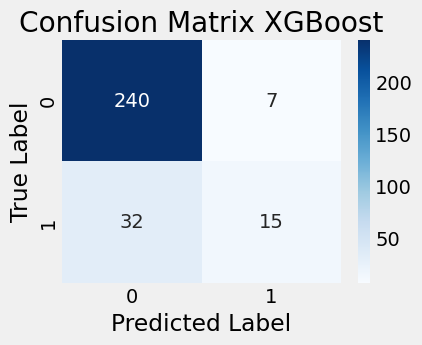

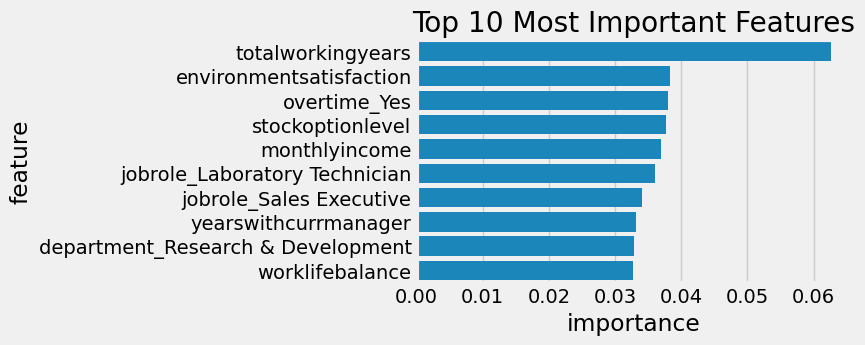

In [47]:
# Model performance on all sets
print("\nModel Performance:")
print(classification_report(y_test_xg, y_pred_xg))
print(f"ROC-AUC Score: {roc_auc_score(y_test_xg, y_pred_proba_xg):.4f}")


# Create confusion matrix
cm_xg = confusion_matrix(y_test_xg, y_pred_xg)


# Plot confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm_xg, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix XGBoost')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Feature importance plot
feature_importance_xg = pd.DataFrame({
      'feature': X_train_xg.columns,
      'importance': final_model_xgb.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(5, 3))
sns.barplot(data=feature_importance_xg.head(10), x='importance', y='feature')
plt.title('Top 10 Most Important Features')
plt.show()

## Apply LightGBM (Optional)

LightGBM is an open-source GBDT framework created by Microsoft as a fast and scalable alternative to XGB and GBM. By default LightGBM will train a Gradient Boosted Decision Tree (GBDT), but it also supports random forests, Dropouts meet Multiple Additive Regression Trees (DART), and Gradient Based One-Side Sampling (Goss).

To know more about LightGBM parameters, refer [here](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html#lightgbm.LGBMClassifier).

### Feature Engineering for LightGBM

In [ ]:
## Following the same procedure as followed in XGBoost

# Copy the dataframe
# YOUR CODE HERE

# Handling categorical features
# YOUR CODE HERE

# Concat the dummy variables to actual dataframe and remove initial categorical columns
# YOUR CODE HERE

# Rename target column
# YOUR CODE HERE

# Features Space
# YOUR CODE HERE

# Target Label
# YOUR CODE HERE

### Model Definition

**Hint:**
* Use LGBMClassifier() to define the model with relevant parameters.
* Use `fit` to fit the data to the model.
* Evaluate the model using roc_auc_score, accuracy_score, f1_score, predict methods or other relevant techniques.

In [ ]:
# Create LightGBM classifier model
# YOUR CODE HERE

In [ ]:
# Model training
# YOUR CODE HERE

### Model performance

In [ ]:
# Model performance on all sets
# YOUR CODE HERE

## Results

**Exercise 12: Create a dataframe of XGBoost results and CatBoost results and display them [0.5 Mark]**

**Hint:** Use pd.DataFrame

In [52]:
# Create a dataframe for computed metrics for different models
eval_df = pd.DataFrame(l,columns=['Model','Accuracy','Precision','Recall','F1','ROC-AUC'])
eval_df.head()

,Model,Accuracy,Precision,Recall,F1,ROC-AUC
0,CatBoost,0.863946,0.521739,0.196721,0.285714,0.741372
1,XGBoost,0.867347,0.681818,0.319149,0.434783,0.787320


Reference reading:
1. https://machinelearningmastery.com/xgboost-for-imbalanced-classification/